In [25]:
from torch.utils.data import DataLoader
from CelebASuperResDataset import CelebASuperResDataset
from SimpleSRCNN import SimpleSRCNN
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [26]:
def plot_batch(lr_batch, hr_batch, n=4):
    """
    Affiche les n premiers couples (LR, HR) d'un batch.
    lr_batch, hr_batch : tenseurs [B, C, H, W]
    """
    fig, axs = plt.subplots(n, 2, figsize=(6, 2*n))

    for i in range(n):
        # LR
        axs[i, 0].imshow(lr_batch[i].permute(1, 2, 0).numpy())
        axs[i, 0].set_title("LR (upscaled)")
        axs[i, 0].axis("off")

        # HR
        axs[i, 1].imshow(hr_batch[i].permute(1, 2, 0).numpy())
        axs[i, 1].set_title("HR (original)")
        axs[i, 1].axis("off")

    plt.tight_layout()
    plt.show()

LR shape: torch.Size([16, 3, 128, 128])
HR shape: torch.Size([16, 3, 128, 128])


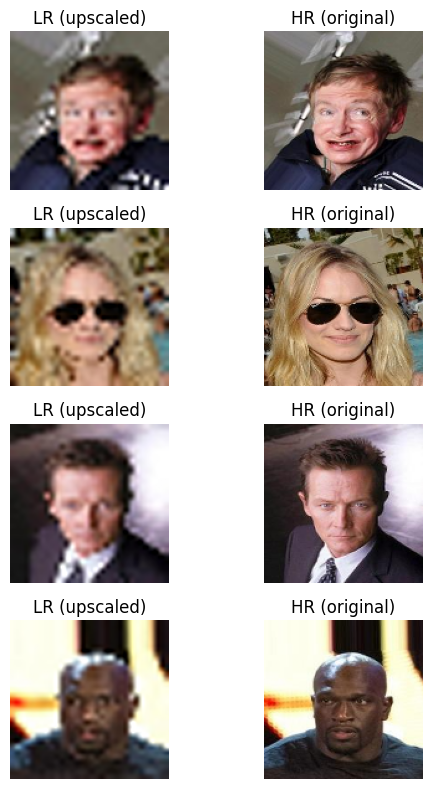

In [27]:
# Crée le dataset
dataset = CelebASuperResDataset("Dataset/img_align_celeba/img_align_celeba", hr_size=128, scale=4)

# Crée un DataLoader
loader = DataLoader(dataset, batch_size=16, shuffle=True)

# Exemple : récupérer un batch
lr, hr = next(iter(loader))

print("LR shape:", lr.shape)  # [batch, 3, 128, 128]
print("HR shape:", hr.shape)  # [batch, 3, 128, 128]

plot_batch(lr, hr, n=4)

In [28]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model = SimpleSRCNN().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)
# prendre un batch
lr, hr = next(iter(loader))
lr, hr = lr.to(device), hr.to(device)

# forward pass
with torch.no_grad():
    sr = model(lr)

print("LR shape:", lr.shape)
print("SR shape:", sr.shape)


LR shape: torch.Size([16, 3, 128, 128])
SR shape: torch.Size([16, 3, 128, 128])


In [29]:
num_epochs = 2

for epoch in range(num_epochs):
    for i, (lr, hr) in enumerate(loader):
        lr, hr = lr.to(device), hr.to(device)
        
        optimizer.zero_grad()
        sr = model(lr)
        loss = criterion(sr, hr)
        loss.backward()
        optimizer.step()
        
        if i % 50 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i}/{len(loader)}], Loss: {loss.item():.4f}")


Epoch [1/2], Step [0/12663], Loss: 0.2978
Epoch [1/2], Step [50/12663], Loss: 0.0183
Epoch [1/2], Step [100/12663], Loss: 0.0089
Epoch [1/2], Step [150/12663], Loss: 0.0070
Epoch [1/2], Step [200/12663], Loss: 0.0055
Epoch [1/2], Step [250/12663], Loss: 0.0047
Epoch [1/2], Step [300/12663], Loss: 0.0045
Epoch [1/2], Step [350/12663], Loss: 0.0050
Epoch [1/2], Step [400/12663], Loss: 0.0039
Epoch [1/2], Step [450/12663], Loss: 0.0049
Epoch [1/2], Step [500/12663], Loss: 0.0053
Epoch [1/2], Step [550/12663], Loss: 0.0048
Epoch [1/2], Step [600/12663], Loss: 0.0039
Epoch [1/2], Step [650/12663], Loss: 0.0046
Epoch [1/2], Step [700/12663], Loss: 0.0044
Epoch [1/2], Step [750/12663], Loss: 0.0039
Epoch [1/2], Step [800/12663], Loss: 0.0051
Epoch [1/2], Step [850/12663], Loss: 0.0048
Epoch [1/2], Step [900/12663], Loss: 0.0057
Epoch [1/2], Step [950/12663], Loss: 0.0052
Epoch [1/2], Step [1000/12663], Loss: 0.0045
Epoch [1/2], Step [1050/12663], Loss: 0.0035
Epoch [1/2], Step [1100/12663], L

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.0212325..1.0142686].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.018655106..1.0243462].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.051883645..1.0150135].


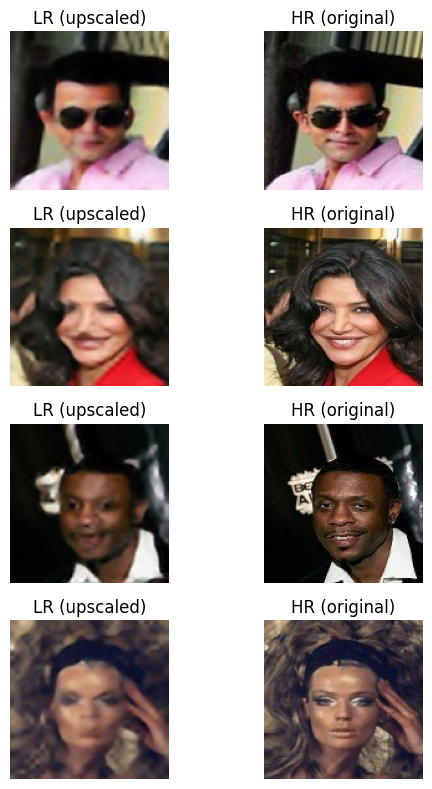

In [30]:
# récupérer un batch
lr, hr = next(iter(loader))
lr, hr = lr.to(device), hr.to(device)

with torch.no_grad():
    sr = model(lr)

plot_batch(sr.cpu(), hr.cpu(), n=4)
